In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from scipy.special import expit, logit

import faker
from faker import utils

import seabornextends as snsexts
from seabornextends import plots, retouch
from seabornextends.retouch import grid, ax, fig

In [3]:
sns.set_style('whitegrid')
mpl.rcParams['grid.color'] = '0.95'
mpl.rcParams['grid.alpha'] = 0.8
mpl.rcParams['font.family'] = 'Roboto Condensed'

The standardised `sigmoid` (i.e. no shift/shape parameters) is equivalent to `inv_logit` which is the inverse of `logit`:

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))

def logit(x):
    return np.log(x) - np.log(1 - x)

In [5]:
print(sigmoid(x=0.458))
# equivalent to sigmoid
print(inv_logit(x=0.458))

0.6125396134409151
0.6125396134409152


In [6]:
logit(inv_logit(x=0.458))

0.4580000000000003

Parameterised sigmoid function:

`alpha`: intercept/shift param

`beta`: shape param

In [7]:
def inv_logit(x, alpha, beta):
    return np.exp(alpha + beta * x) / (1 + np.exp(beta * x + alpha))

In [8]:
def sigmoid(x, alpha, beta):
    return 1.0 / (1.0 + np.exp(-alpha + -beta * x))

In [9]:
def logistic(x, alpha, beta):
    return 1.0 / (1.0 + np.exp(beta * x + alpha))

In [10]:
print(inv_logit(x=0.458, beta=1, alpha=0))
print(sigmoid(x=0.458, beta=1, alpha=0))
print(logistic(x=0.458, beta=-1, alpha=0))

0.6125396134409152
0.6125396134409151
0.6125396134409151


In [11]:
print(inv_logit(x=0.458, beta=2, alpha=0))
print(sigmoid(x=0.458, beta=2, alpha=0))
print(logistic(x=0.458, beta=-2, alpha=0))

0.7142263775539306
0.7142263775539306
0.7142263775539306


In [12]:
print(inv_logit(x=0.458, beta=2, alpha=1))
print(sigmoid(x=0.458, beta=2, alpha=1))
print(logistic(x=0.458, beta=-2, alpha=-1))

0.8716917173705981
0.8716917173705981
0.8716917173705981


The link between the logistic _function_ and the logistic _distribution_ is that the CDF of the _standard_ logistic distribution **is** the logistic function, which is the inverse of the logit function. While the CDF of many distribution families is S-shaped, the logistic is more suited for regression as it's got heavier tails.

In [13]:
stats.logistic(loc=0, scale=1).cdf(0.458)

0.6125396134409151

In [14]:
expit(0.458)

0.6125396134409151

In [15]:
logit(expit(0.458))

0.4579999999999999

Multiple shapes:

In [24]:
shape_grid = {
    'x': np.linspace(-4, 4, 100),
    'alpha': [0, 1, 2],
    'beta': [-3, -2, -1, 1, 2, 3]
}

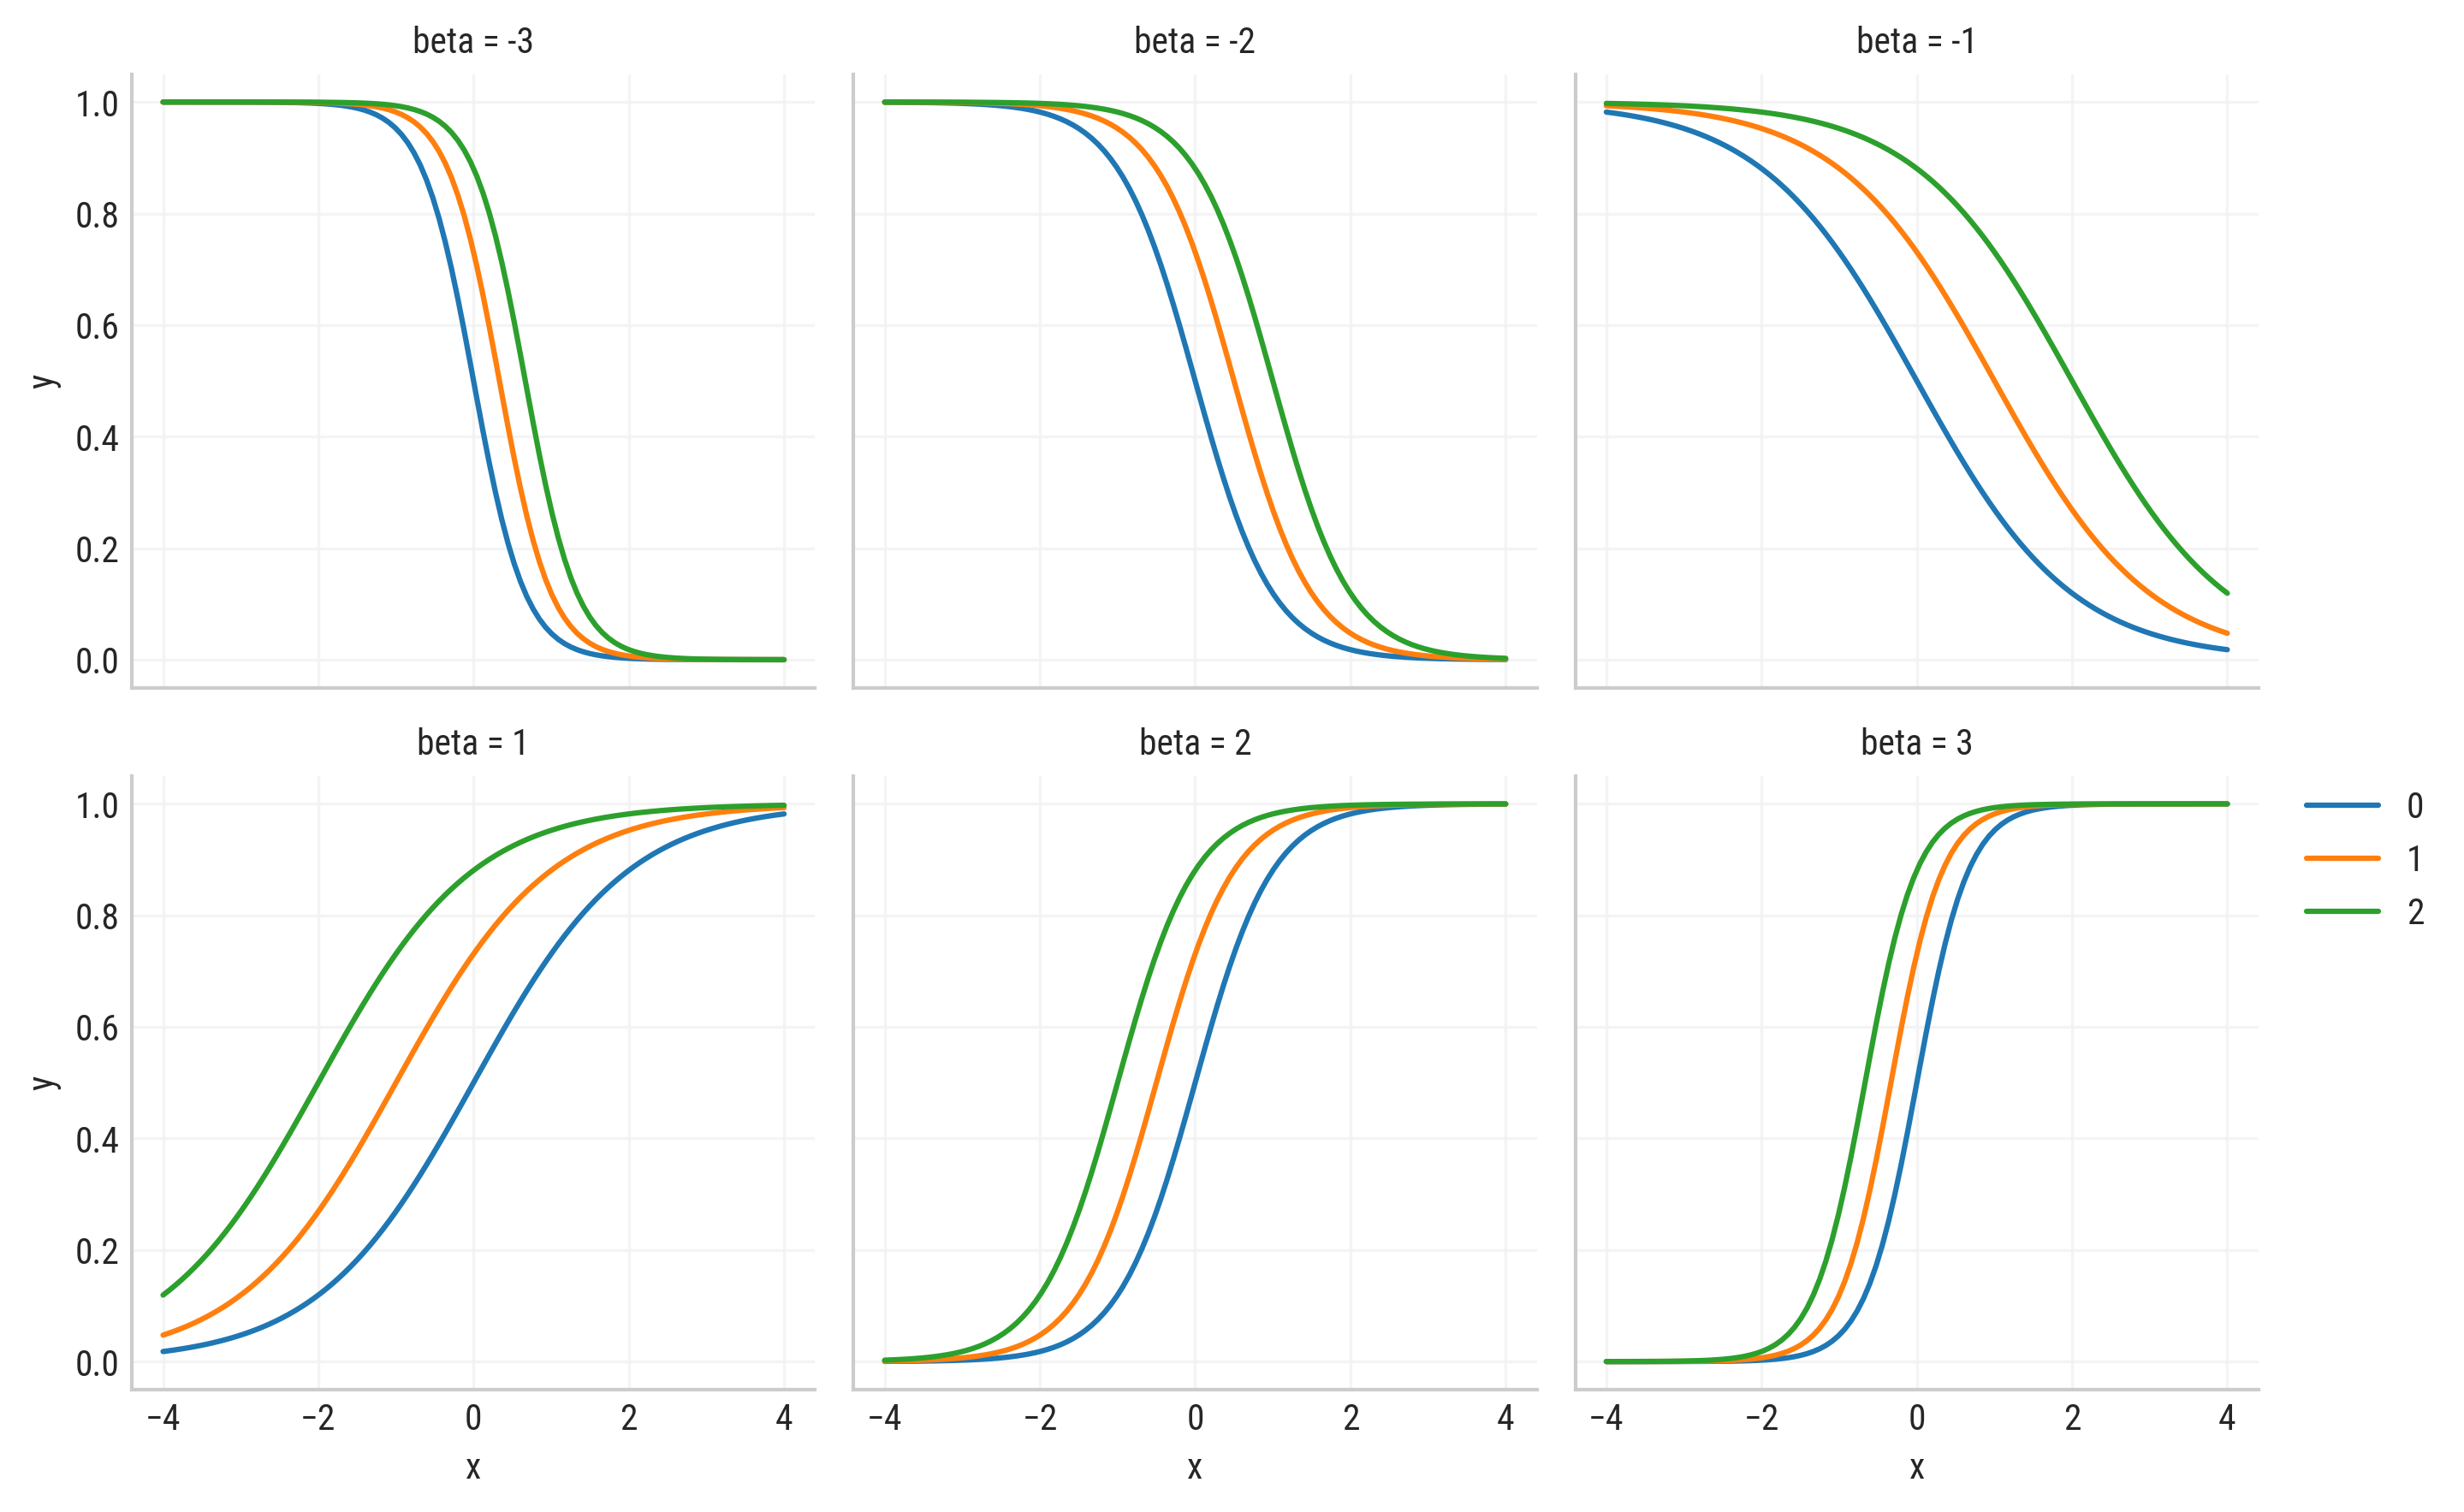

In [29]:
df = faker.utils.stacked_from_function(func=sigmoid,
                                       param_grid=shape_grid,
                                       iters=1,
                                       col_names=['y'],
                                       make_cats=['alpha', 'beta'],
                                       seed=12345)
grid = snsexts.plots.plot(x='x',
                          y='y',
                          data=df,
                          hue='alpha',
                          col='beta',
                          col_wrap=3)

retoucher = retouch.grid.FacetGridRetoucher(grid)
retoucher.fig.set_dpi(300)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.0)

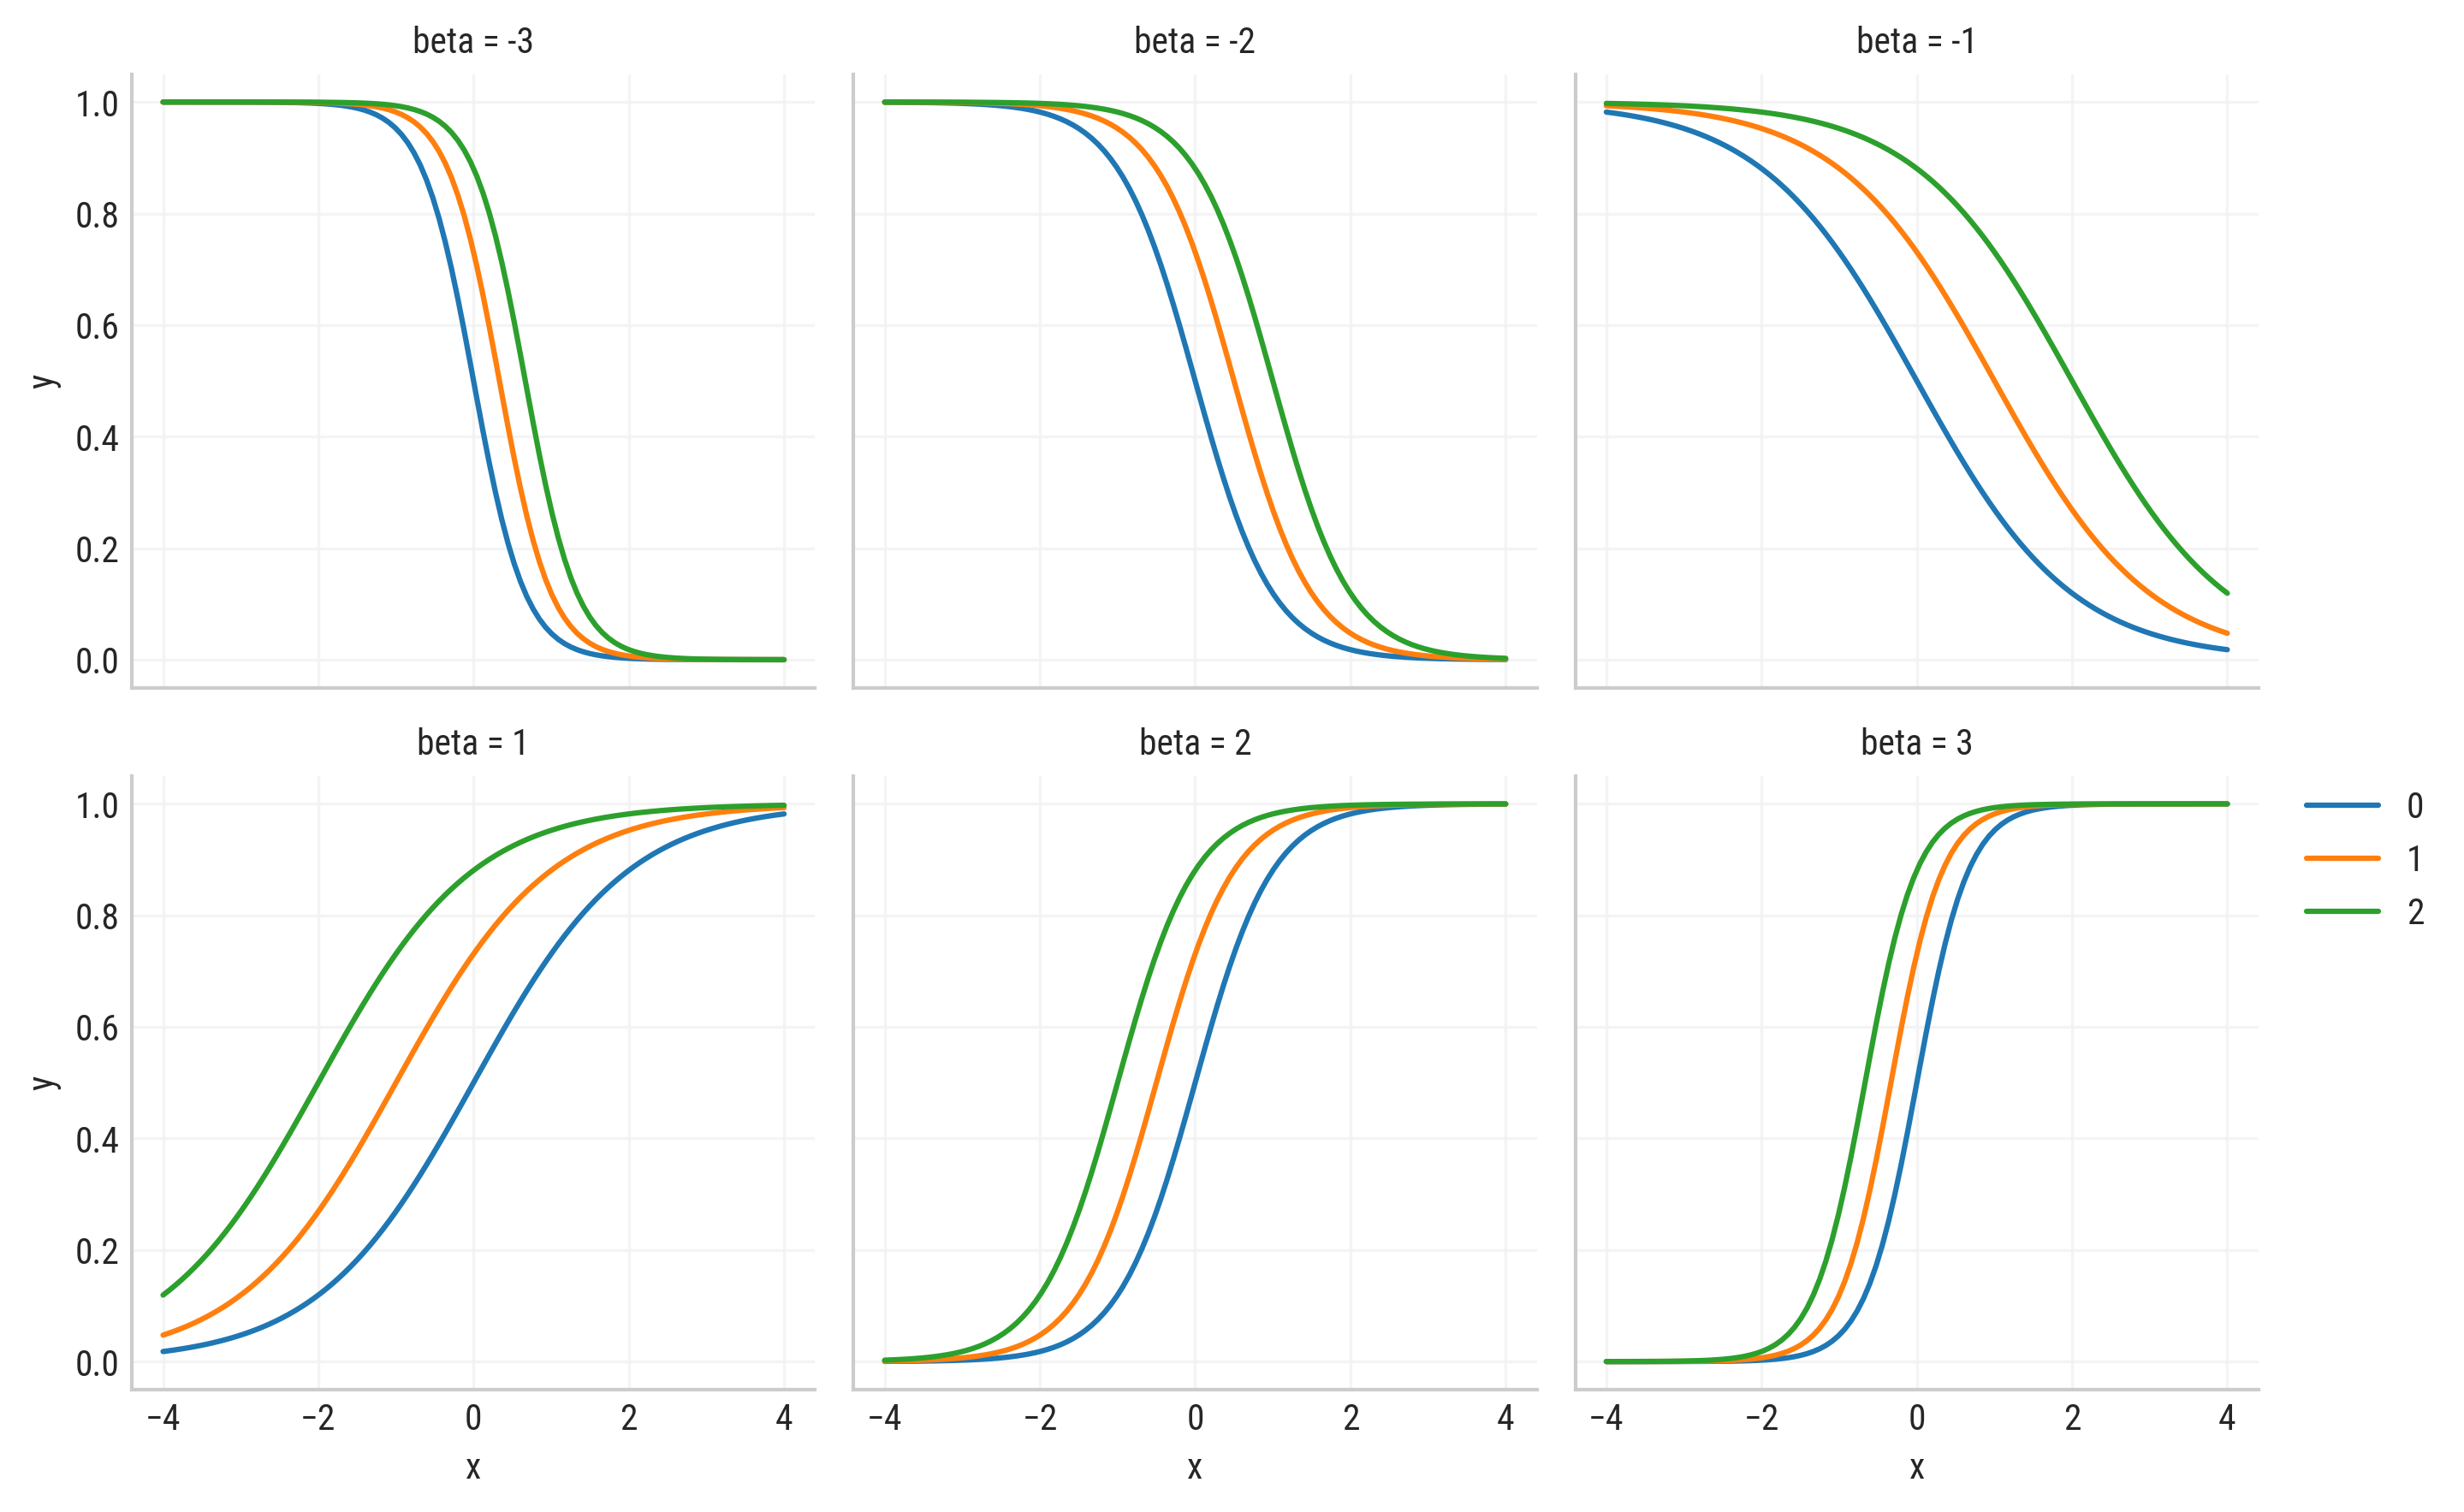

In [30]:
df = faker.utils.stacked_from_function(func=inv_logit,
                                       param_grid=shape_grid,
                                       iters=1,
                                       col_names=['y'],
                                       seed=12345)


grid = snsexts.plots.plot(x='x',
                          y='y',
                          data=df,
                          hue='alpha',
                          col='beta',
                          col_wrap=3)

retoucher = retouch.grid.FacetGridRetoucher(grid)
retoucher.fig.set_dpi(300)

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.0)